# Eigenvalues and eigenvectors calculation

By definition, given a matrix $A$, we say that $\lambda \in \mathbb{C}$ is an _eigenvalue_ of $A$ if exists $\mathbf{x} \neq 0$ such that $A \mathbf{x} = \lambda \mathbf{x}$. The vector $\mathbf{x}$ is called an eigenvector relative to $\lambda$. 
if $\mathbf{x}$ is known, the corresponding eigenvalue can be determined using the Raileigh quotient:

$\lambda = \dfrac{\mathbf{x}^H A \mathbf{x}}{\|\mathbf{x}\|^2}$

Based on this, we will se the power and inverse power methods to determine the maximum eigenvalue of a matrix.

## Power iteration

Find the largest eigenvalue $\lambda_{\max}$. Let's start at $k=1$, from a starting guess $\mathbf{z}_0$:
\begin{align*}
\mathbf{q}_k & = \frac{\mathbf{z}_{k-1}}{\|\mathbf{z}_{k-1}\|_2}\\
\mathbf{z}_k & = A\mathbf{q}_{k}\\
\lambda_{\max}^k & = \mathbf{q}^H_k \mathbf{z}_k
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 9
h = 1./(n-1)

x=np.linspace(0,1,n)

a = -np.ones((n-1,))
b = 2*np.ones((n,))
A = (np.diag(a, -1) + np.diag(b, 0) + np.diag(a, +1))

A /= h**2

In [3]:
def PM(A, z0=None, tol=1e-5, nmax=500, history=False):
    """
    Power method for the computation of the largest eigenvalue of a matrix A
    """
    
    n,m = A.shape
    assert n == m, "Matrix must be square"
    
    if z0 is None:
        z0 = np.ones(n)

    # Normalise initial guess
    q = z0/np.linalg.norm(z0) # completed
    q_hist = [q]
    it = 0
    err = tol + 1.
    errs = []
    while it < nmax and err > tol:
        z = A @ q # completed
        l = np.dot(q.T, z) # completed
        err = np.linalg.norm(z-l*q,2)
        q = z/np.linalg.norm(z, 2)
        
        it += 1
        errs.append(err)
        if history:
            q_hist.append(q)
    if history:
        return q_hist
    else:
        return l, q, it, errs

l_pow, x_pow, power_iter_count, errs_pow = PM(A)

print(f"Largest eigenvalue: {l_pow}, found in {power_iter_count} iterations")
print(f"Numpy largest eigenvalue: {np.linalg.eigvals(A).max()}")

Largest eigenvalue: 249.7352340857781, found in 82 iterations
Numpy largest eigenvalue: 249.73523408577987


## Inverse power method with shift
- Find the eigenvalue $\lambda$ **closest** to $\mu$
\begin{align*}
M & = A-\mu I\\
& \\
M\mathbf{x}_k &= \mathbf q_{k-1}\\
\mathbf{q}_k & = \frac{\mathbf{x}_k}{\|\mathbf{x}_k\|_2}\\
\mathbf{z}_k & = A\mathbf{q}_{k}\\
\lambda^k & = \mathbf{q}^T_k \mathbf{z}_k
\end{align*}


In [5]:
def IPM(A, z0=None, mu=0, tol=1e-5, nmax=500, history=False):
    """
    Inverse Power Method for the computation of the eigenvalue of a matrix A closest to mu
    """
    
    n,m = A.shape
    assert n == m, "Matrix must be square"

    # Initial guess
    if z0 is None:
        z0 = np.ones(n)

    # Normalize initial guess
    q = z0/np.linalg.norm(z0, 2)
    
    # Shifted matrix
    M = A-mu*np.eye(n)

    err = tol + 1.
    q_hist = [q]
    errs = []
    it = 0
    while it < nmax and err > tol:
        x = np.linalg.solve(M, q)
        q = x/np.linalg.norm(x, 2)
        z = A@q
        l = q.T@z

        err = np.linalg.norm(z-l*q,2)
        errs.append(err)
        it += 1
        if history:
            q_hist.append(q)
    if history:
        return q_hist
    else:
        return l, q, it, errs

In [8]:
l_inv_pow, x_inv_pow, inverse_power_iter_count, errs_inv_pow = IPM(A, mu=2)
print(f"Eigenvalue: {l_inv_pow}, found in {inverse_power_iter_count} iterations")

l_inv_pow, x_inv_pow, inverse_power_iter_count, errs_inv_pow = IPM(A, mu=300)
print(f"Eigenvalue: {l_inv_pow}, found in {inverse_power_iter_count} iterations")

l_inv_pow, x_inv_pow, inverse_power_iter_count, errs_inv_pow = IPM(np.linalg.inv(A), mu=0)
print(f"Eigenvalue: {1/l_inv_pow}, found in {inverse_power_iter_count} iterations")

Eigenvalue: 6.264765914220894, found in 6 iterations
Eigenvalue: 249.73523408577884, found in 26 iterations
Eigenvalue: 249.72946643249568, found in 28 iterations


In [ ]:
np.linalg.eigvals(A)

array([249.73523409, 231.55417528, 203.23651229, 167.55417528,
       128.        ,   6.26476591,  24.44582472,  88.44582472,
        52.76348771])

Eigenvalue: 6.264765914220894, found in 6 iterations


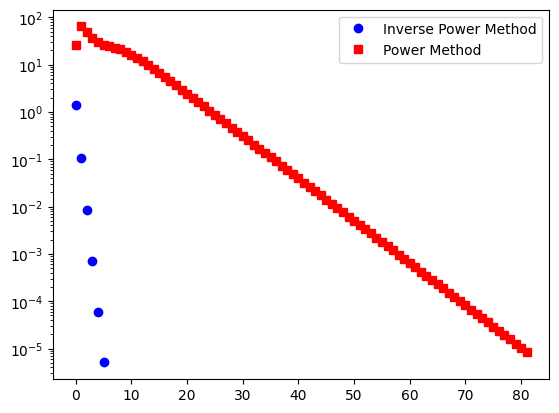

In [10]:
# plot convergence of power and inverse power methods
l_inv_pow, x_inv_pow, inverse_power_iter_count, errs_inv_pow = IPM(A, mu=2)
print(f"Eigenvalue: {l_inv_pow}, found in {inverse_power_iter_count} iterations")

plt.semilogy(range(inverse_power_iter_count), errs_inv_pow, "bo", label="Inverse Power Method")
plt.semilogy(range(power_iter_count), errs_pow, "rs", label="Power Method")
plt.legend()

In [16]:
# Example matrix
A = np.array([[2, 1],
              [1, 3]])

eigvals, eigvecs = np.linalg.eig(A)
print(eigvals, eigvecs)

# Get iteration vectors
z0 = np.array([0, 1])
x_pow = PM(A, z0=z0, history=True)
x_ipm = IPM(np.linalg.inv(A), mu=0, z0=z0, history=True)
print(len(x_pow))
print(len(x_inv_pow))
print(x_pow[-1])
print(x_ipm[-1])

[1.38196601 3.61803399] [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]
15
9
[0.52573037 0.85065127]
[0.52571784 0.85065901]


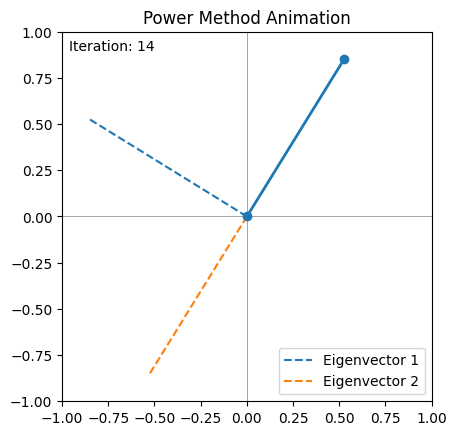

In [17]:
from matplotlib.animation import FuncAnimation

def animate_vectors(A, eigvecs, x_list, title="Power Method Animation"):
    fig, ax = plt.subplots()
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)
    ax.set_title(title)

    # Plot eigenvectors (for reference)
    for i, v in enumerate(eigvecs.T):
        v = v / np.linalg.norm(v)
        ax.plot([0, v[0]], [0, v[1]], '--', lw=1.5, label=f'Eigenvector {i+1}')

    # Vector that will be updated
    vec_line, = ax.plot([], [], 'o-', color='tab:blue', lw=2)
    text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

    x_list = [x / np.linalg.norm(x) for x in x_list]

    def init():
        vec_line.set_data([0, z0[0]], [0, z0[1]])
        text.set_text('')
        return vec_line, text

    def update(frame):
        x = x_list[frame]
        vec_line.set_data([0, x[0]], [0, x[1]])
        text.set_text(f"Iteration: {frame}")
        return vec_line, text

    ani = FuncAnimation(fig, update, frames=len(x_list),
                        init_func=init, blit=True, interval=700, repeat=False)

    ax.legend()
    return ani


# Run animations
ani_pow = animate_vectors(A, eigvecs, x_pow, "Power Method Animation")
# ani_ipm = animate_vectors(A, eigvecs, x_ipm, "Inverse Power Method")

from IPython.display import HTML
HTML(ani_pow.to_jshtml())
#animate_vectors(A, eigvecs, x_ipm, f"Inverse Power Method (shift={2.5})")